In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Questions to answer:
Есть ли у пациентов с диабетом более высокая вероятность развития сердечных заболеваний в раннем возрасте?

Есть ли определенная демографическая группа, которая подвержена более высокому риску сердечных заболеваний, чем другие?

Снижают ли частые упражнения риск развития сердечных заболеваний?

У курильщиков больше шансов заболеть сердечно-сосудистыми заболеваниями, чем у некурящих?

In [9]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Data analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Are age and sex markers for death?

Text(0, 0.5, 'Death count')

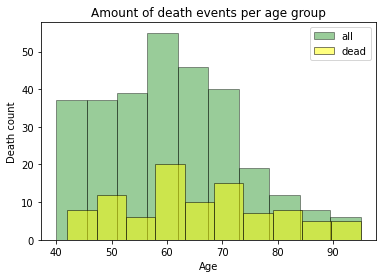

In [100]:
plt.hist(data['age'], color='green', edgecolor = 'black',bins = int(100/10), label='all', alpha=0.4)
plt.hist(data[data['DEATH_EVENT'] == 1]['age'], color = 'yellow', edgecolor = 'black', bins = int(100/10), label='dead',
         alpha=0.5)
plt.legend()
plt.title('Amount of death events per age group')
plt.xlabel('Age')
plt.ylabel('Death count')

Death of people around 60 is more likely compared to other groups. We also see that age is a big reason for death as almost all people over 85 are dead.

Text(0, 0.5, 'Death count')

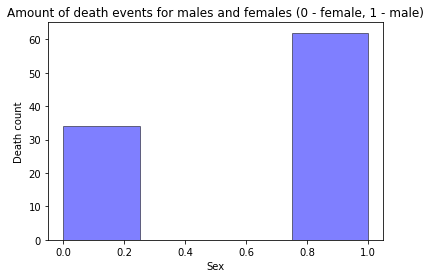

In [106]:
plt.hist(data[data['DEATH_EVENT'] == 1]['sex'], color = 'blue', edgecolor = 'black',
         bins = int(4), alpha=0.5)
plt.title('Amount of death events for males and females (0 - female, 1 - male)')
plt.xlabel('Sex')
plt.ylabel('Death count')

There are almost twice as many deaths in males compared to females. Let's see in persentage

Text(0.5, 1.0, 'Pie chart of death and sex info')

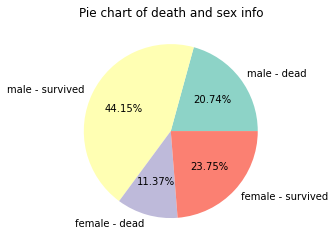

In [91]:
male = data[data['sex'] == 1]
female = data[data['sex'] == 0]

pie_info = [len(male[male['DEATH_EVENT'] == 1]), len(male[male['DEATH_EVENT'] == 0]), len(female[female['DEATH_EVENT'] == 1]), len(female[female['DEATH_EVENT'] == 0])]
labels = ['male - dead', 'male - survived', 'female - dead', 'female - survived']

fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis')
ax.pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
ax.set_title('Pie chart of death and sex info')

We can see that there are more data about men.

## Let's see data correlation using sns heatmap

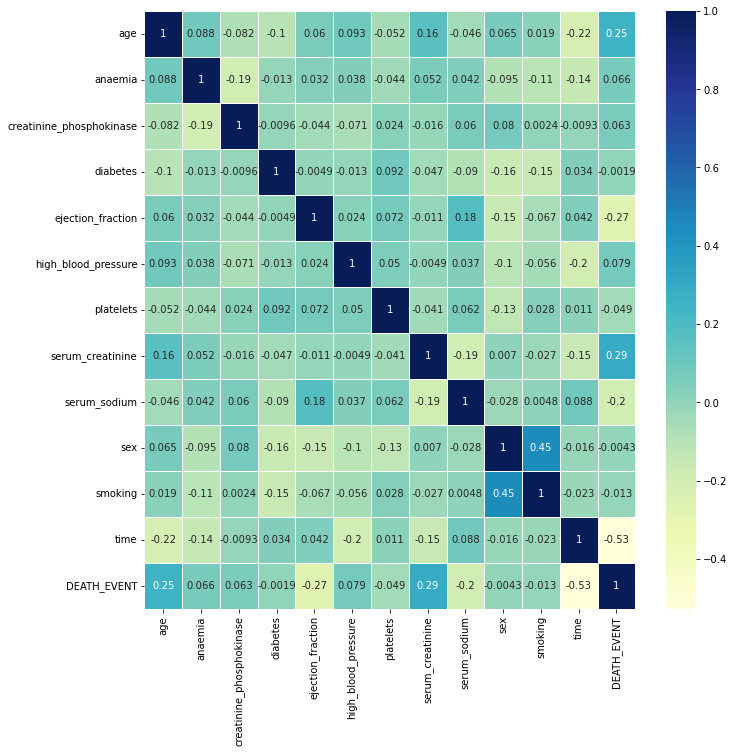

In [45]:
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)
plt.show()

We are interested in any correlation with DEATH_EVENT, anaemia, high blood pressure. First thing I'd like to to analyze is the correlation between death and serum creatinine. \
\
The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L) For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

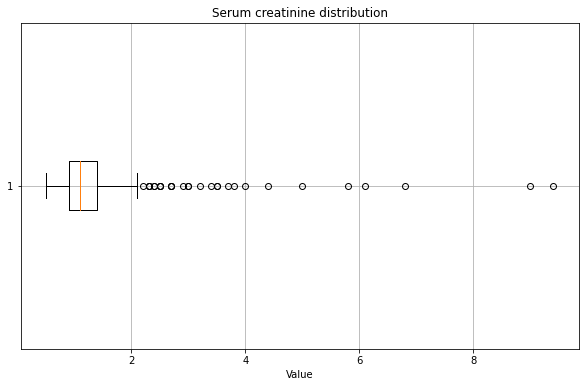

In [57]:
plt.figure(figsize=(10,6))
plt.boxplot(data['serum_creatinine'], vert=False)
plt.xlabel('Value')
plt.title("Serum creatinine distribution")
plt.grid()

Text(0.5, 1.0, 'Pie chart of correlation betweeen death and high creatinin level')

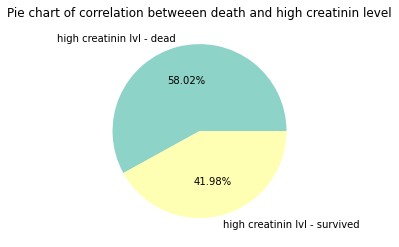

In [92]:
# Let's see if outliers are more likely to end up dead

outliers = data[data['serum_creatinine'] > 1.35]
normal = data[data['serum_creatinine'] <= 1.35]

pie_info = [len(outliers[outliers['DEATH_EVENT'] == 1]), len(outliers[outliers['DEATH_EVENT'] == 0])]
labels = ['high creatinin lvl - dead', 'high creatinin lvl - survived']
fig, ax1 = plt.subplots()
ax1.pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
ax1.set_title('Pie chart of correlation betweeen death and high creatinin level')

Text(0.5, 1.0, 'Pie chart of correlation betweeen death and low creatinin level')

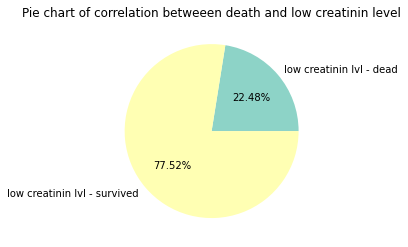

In [93]:
pie_info = [len(normal[normal['DEATH_EVENT'] == 1]), len(normal[normal['DEATH_EVENT'] == 0])]
labels = ['low creatinin lvl - dead', 'low creatinin lvl - survived']
fig, ax = plt.subplots()
ax.pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
ax.set_title('Pie chart of correlation betweeen death and low creatinin level')

We see that people with higher creatinine level are more likely to die.

## Are patients with diabetes more likely to develop heart disease at an early age?


Text(0, 0.5, 'Diabetes')

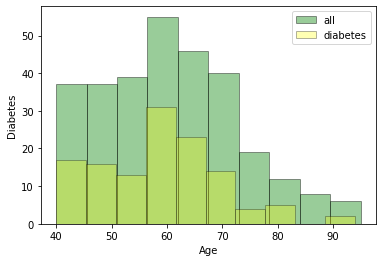

In [103]:
# first, let's see diabetes distribution
plt.hist(data['age'], color='green', edgecolor = 'black',bins = int(100/10), label='all', alpha=0.4)
plt.hist(data[data['diabetes'] == 1]['age'], color = 'yellow', edgecolor = 'black', bins = int(100/10), label='diabetes', alpha=0.3)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Diabetes')

In [64]:
diabetes = data[data['diabetes'] == 1]
no_diabetes = data[data['diabetes'] == 0]

print('Average age of death in people with diabetes: ', diabetes[diabetes['DEATH_EVENT'] == 1]['age'].mean())
print('Average age of death in people without diabetes: ', no_diabetes[no_diabetes['DEATH_EVENT'] == 1]['age'].mean())

Average age of death in people with diabetes:  62.891675
Average age of death in people without diabetes:  66.875


Text(0.5, 1.0, 'Correlation between high blood pressure and diabetes, in persentage')

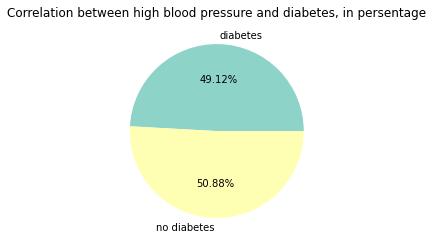

In [109]:
x = ['diabetes', 'no diabetes']
y = [len(diabetes[diabetes['high_blood_pressure'] == 1])/len(diabetes)*100, 
    len(no_diabetes[no_diabetes['high_blood_pressure'] == 1])/len(no_diabetes)*100]

plt.pie(y, labels=x, autopct='%1.2f%%', colors=sns.color_palette('Set3'))
plt.title('Correlation between high blood pressure and diabetes, in persentage')

We see no correlation between diabetes and high blood pressure, data for both groups is almost identical.

## Let's see if there's any correlation between smoking and diseases.

In [80]:
smokers = data[data['smoking'] == 1]
non_smokers = data[data['smoking'] == 0]

print(' Smokers: ', len(smokers), 'people.')
print(' Non-smokers: ', len(non_smokers), 'people.')

 Smokers:  96 people.
 Non-smokers:  203 people.


Text(0, 0.5, 'Amount')

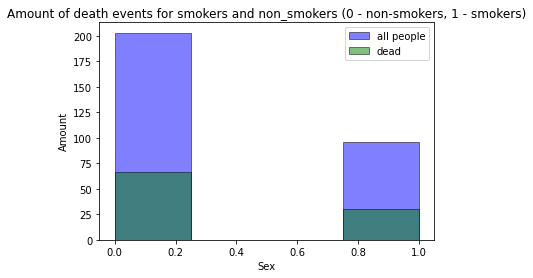

In [121]:
plt.hist(data['smoking'], color = 'blue', edgecolor = 'black',
         bins = int(4), alpha=0.5, label='all people')
plt.hist(data[data['DEATH_EVENT'] == 1]['smoking'], color = 'green', edgecolor = 'black',
         bins = int(4), alpha=0.5, label='dead')
plt.legend()
plt.title('Amount of death events for smokers and non_smokers (0 - non-smokers, 1 - smokers)')
plt.xlabel('Sex')
plt.ylabel('Amount')

We can see that there's much more deaths in non-smoking people, but compared to smokers, but it is dataset problem (too small and has a lot of smokers) and not really valid data.

([<matplotlib.patches.Wedge at 0x13f76534970>,
 [Text(0.5743854824725364, 0.9381264933497997, 'non-smokers - dead'),
  Text(-0.5743853946387926, -0.9381265471276456, 'non-smokers - survived')],
 [Text(0.31330117225774706, 0.5117053600089816, '32.51%'),
  Text(-0.31330112434843227, -0.5117053893423521, '67.49%')])

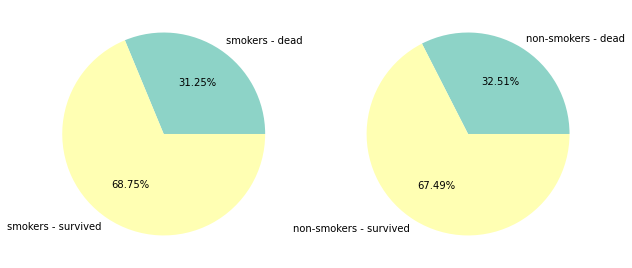

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
pie_info = [len(smokers[smokers['DEATH_EVENT'] == 1]), len(smokers[smokers['DEATH_EVENT'] == 0])]
labels = ['smokers - dead', 'smokers - survived']
axs[0].pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))

pie_info = [len(non_smokers[non_smokers['DEATH_EVENT'] == 1]), len(non_smokers[non_smokers['DEATH_EVENT'] == 0])]
labels = ['non-smokers - dead', 'non-smokers - survived']
axs[1].pie(pie_info, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Set3'))

In propotion, we see no correlation between smoking and heart failure.

## Now, let's build classification model.

In [169]:
y = data['DEATH_EVENT']
x = data.drop(['DEATH_EVENT'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [146]:
rf = RandomForestClassifier(verbose=True)
rf_params = {"max_depth": range(3,19,3),
             "max_features": range(3,12,2),
             "n_estimators": [10, 500, 1000],
             "min_samples_split": [2, 5, 10]}
grid = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose=True)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(verbose=True), n_jobs=-1,
             param_grid={'max_depth': range(3, 19, 3),
                         'max_features': range(3, 12, 2),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=True)

In [147]:
grid.best_params_

{'max_depth': 6,
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 10}

In [150]:
rf_params = {"max_depth": range(5,8,1),
             "max_features": range(6,9,1),
             "n_estimators": range(2,500, 50),
             "min_samples_split": [10, 20, 30, 40, 50]}

In [151]:
grid = GridSearchCV(rf, rf_params, cv = 10, verbose=True)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=10, estimator=RandomForestClassifier(verbose=True),
             param_grid={'max_depth': range(5, 8), 'max_features': range(6, 9),
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': range(2, 500, 50)},
             verbose=True)

In [152]:
grid.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_split': 20,
 'n_estimators': 152}

In [170]:
rf = RandomForestClassifier(max_depth=6,
 max_features=6,
 min_samples_split=20,
 n_estimators=152, verbose=True)

In [171]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=6, max_features=6, min_samples_split=20,
                       n_estimators=152, verbose=True)

In [172]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished


0.8333333333333334